# Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained

# Airline Dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [8]:
airline=pd.read_excel('EastWestAirlines.xlsx',index_col=0)
airline.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [9]:
airline.shape

(3999, 11)

In [10]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [11]:
airline.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [12]:
# Scaling the data with Standard scaler

In [13]:
sd=StandardScaler()

In [14]:
airline_new=sd.fit_transform(airline)

In [15]:
airline.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [16]:
airline_new

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca=PCA(n_components=6)

In [19]:
airline_new1=pca.fit_transform(airline_new)

In [20]:
pca.explained_variance_ratio_

array([0.29867646, 0.15709627, 0.09587939, 0.09175396, 0.08729112,
       0.08292369])

In [21]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29867646, 0.45577273, 0.55165212, 0.64340608, 0.7306972 ,
       0.81362088])

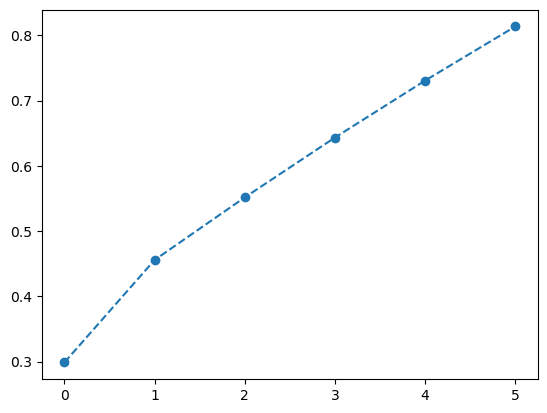

In [22]:
plt.plot(pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')

In [23]:
pca.components_

array([[ 0.31766175,  0.08361317,  0.40349082,  0.00342181,  0.07766901,
         0.44538243,  0.44499769,  0.3055922 ,  0.32270179,  0.18924703,
         0.30581841],
       [-0.04444854,  0.17999342, -0.40626954,  0.06747226, -0.13317226,
        -0.30637327, -0.02459643,  0.57404024,  0.57066275, -0.16749864,
        -0.02410114],
       [-0.26960418, -0.42560964,  0.01835712,  0.36768586,  0.56132694,
         0.13553562,  0.18820254,  0.08376832,  0.06889567, -0.46587409,
        -0.11384069],
       [ 0.05436059, -0.22026803, -0.02022445,  0.81978908, -0.44253529,
        -0.05408537,  0.05162904, -0.0577038 , -0.03163798,  0.25571467,
         0.07010569],
       [ 0.12168971,  0.72964319, -0.11679789,  0.40986724,  0.48110466,
        -0.00570615, -0.08691421, -0.12327832, -0.09715167,  0.08614578,
         0.0086085 ],
       [ 0.299731  , -0.39669975, -0.22950259, -0.06692758,  0.43386197,
        -0.12513648, -0.14819335,  0.09780912,  0.10047637,  0.63727801,
        -0.209

In [24]:
pca.explained_variance_

array([3.28626284, 1.72849117, 1.05493714, 1.00954599, 0.96044246,
       0.91238871])

In [25]:
airline_new1.shape

(3999, 6)

In [26]:
# Checking for optimal value of K with Elbow method

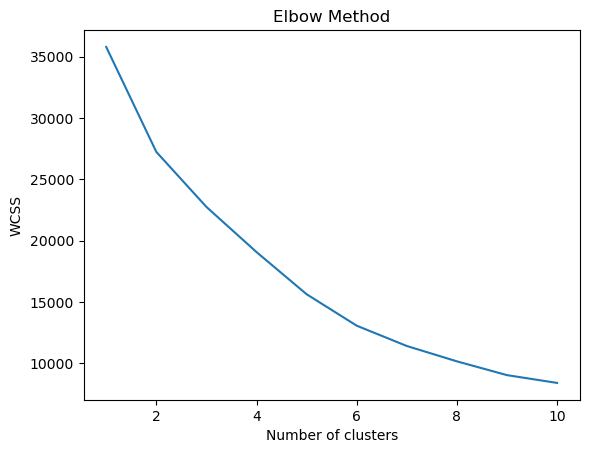

In [27]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(airline_new1)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
wcss

[35790.36907691586,
 27235.173118587583,
 22749.225619253873,
 19068.898646673988,
 15631.009425659258,
 13066.961483018971,
 11410.38695687984,
 10159.315387397568,
 9034.757088073915,
 8400.437739710307]

In [29]:
#Checking for K value with Silhouette Score

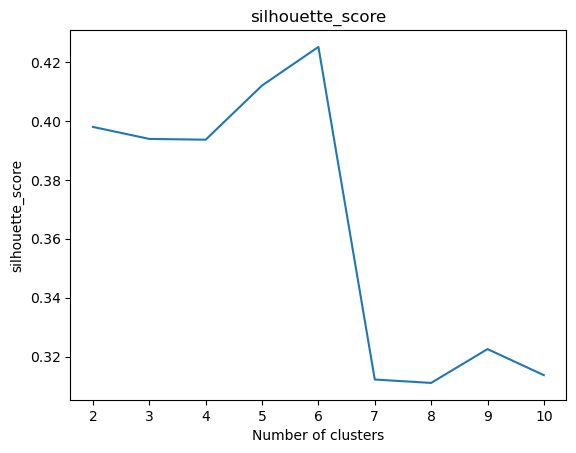

In [30]:
from sklearn.metrics import silhouette_score

sil = []

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(airline_new1)
    labels = kmeans.labels_
    sil.append(silhouette_score(airline_new1, labels, metric = 'euclidean'))

plt.plot(range(2, 11), sil)
plt.title('silhouette_score')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show()


In [60]:
#from sklearn.model_selection import GridSearchCV

In [95]:
#X = airline_new1[:, 0:11]
#Y = airline_new1[:, -1]

In [96]:
#param_dist={'n_clusters':[2,3,4,5,6,7,8]}

In [97]:
#grid=GridSearchCV(estimator=km,param_grid=param_dist,cv=5)
#grid.fit(X,Y)

GridSearchCV(cv=5, estimator=KMeans(),
             param_grid={'n_clusters': [2, 3, 4, 5, 6, 7, 8]})

In [98]:
#print(grid.best_score_)
#print(grid.best_params_)

-2772.658503206701
{'n_clusters': 8}


In [31]:
# from above it seems 6 is the optimum number for k

In [99]:
km = KMeans(n_clusters=6,random_state=42)
y_means = km.fit_predict(airline_new1)

In [33]:
y_means.shape

(3999,)

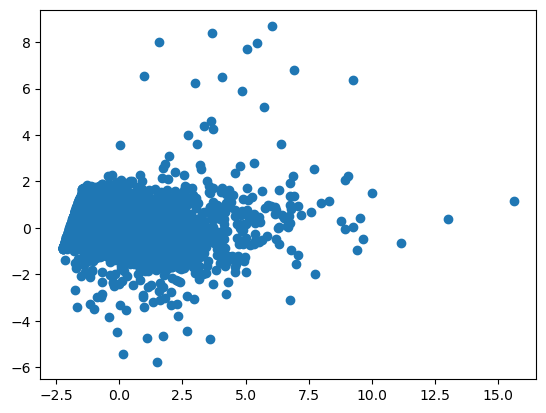

In [34]:
plt.scatter(x=airline_new1[:,0], y=airline_new1[:,-1])

In [35]:
airline['clusterid_new']=y_means

In [36]:
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
4018,64385,0,1,1,1,981,5,0,0,1395,1,0
4019,73597,0,3,1,1,25447,8,0,0,1402,1,1


In [37]:
airline['clusterid_new'].value_counts()

0    2505
1    1234
2     141
5      61
4      43
3      15
Name: clusterid_new, dtype: int64

# Using hierarchical clustering

In [38]:
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [49]:
airline_transformed =scaler.fit_transform(airline)

In [50]:
airline_transformed

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 1.        , 0.2       ,
        0.        ],
       [0.03220189, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

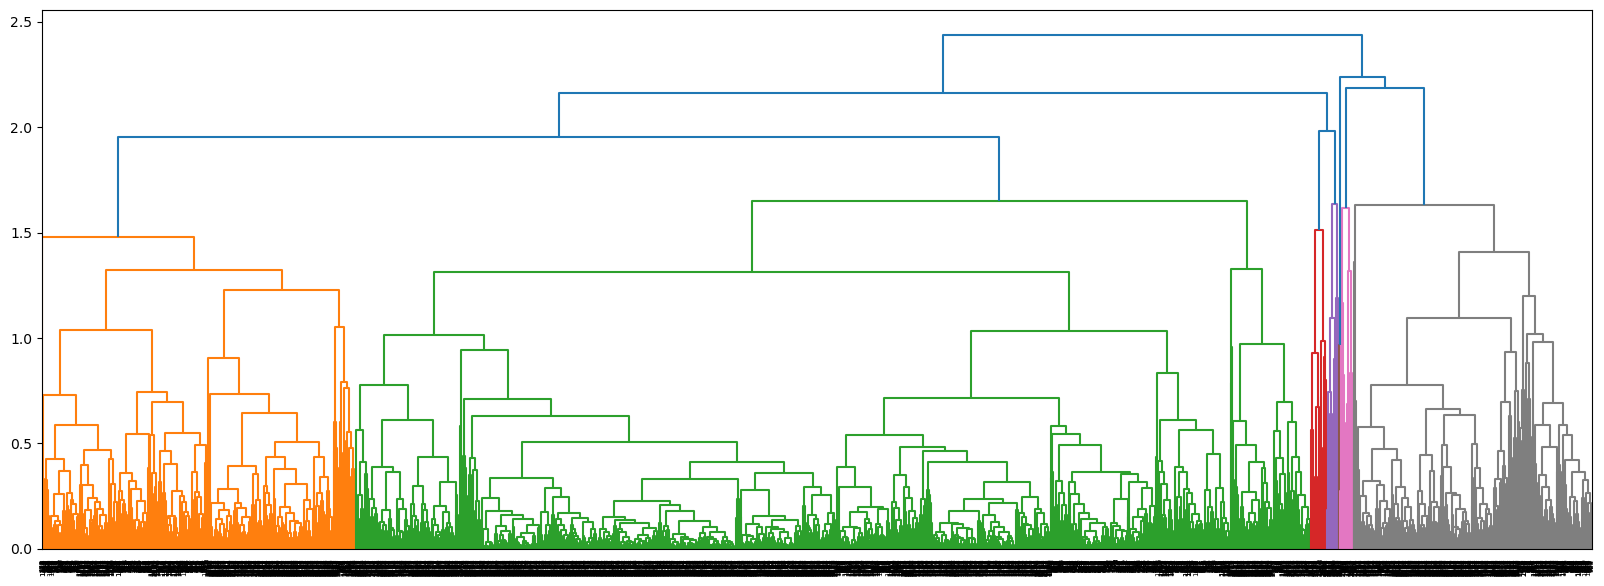

In [51]:
# create dendrogram
plt.figure(figsize=(20, 7))
dendrogram = sch.dendrogram(sch.linkage(airline_transformed, method='complete'))

In [52]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [53]:
hc.fit(airline_transformed)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [54]:
y_hc=hc.fit_predict(airline_transformed)

In [55]:
y_hc

array([1, 1, 1, ..., 4, 1, 1], dtype=int64)

In [56]:
airline['h_clusterid'] = y_hc

In [57]:
airline.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new,h_clusterid
ID#,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1


In [59]:
airline['h_clusterid'].value_counts()

1    3274
4     615
0      72
3      34
2       4
Name: h_clusterid, dtype: int64

# Using DBSCAN clustering

In [100]:
from sklearn.cluster import DBSCAN

In [101]:
dbscan = DBSCAN(eps=5, min_samples=5)
dbscan.fit_predict(airline_new)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [102]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [104]:
airline['cluster_DBScan']=dbscan.labels_
airline.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new,h_clusterid,cluster_DBScan
ID#,,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0,1,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0,1,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0,1,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0,1,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1,0


In [113]:
airline['cluster_DBScan'].value_counts()

 0    3931
 2      28
-1      20
 1      15
 3       5
Name: cluster_DBScan, dtype: int64

In [115]:
# get noisy datapoints -1

airline[airline['cluster_DBScan']==-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new,h_clusterid,cluster_DBScan
ID#,,,,,,,,,,,,,,
109,96627,1182,1,1,3,49059,26,2300,9,6738,1,3,4,-1
279,1704838,0,1,1,1,17108,32,4823,23,7283,1,2,1,-1
348,112501,0,1,1,2,19140,11,0,0,7101,0,0,1,-1
426,529886,7210,1,1,1,23866,26,7741,15,8296,1,5,3,-1
861,25629,0,4,1,5,107308,36,600,2,5966,1,3,4,-1
915,15835,0,2,1,5,112171,16,0,0,5825,1,3,4,-1
1047,154664,0,4,1,3,73881,33,0,0,5769,0,3,0,-1
1313,737514,0,3,1,4,43993,40,2150,7,5030,0,3,0,-1
1934,82981,0,5,1,3,105325,44,1000,2,3964,1,3,4,-1
